In [1]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
heart= pd.read_csv("heart2.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart.shape

(1025, 14)

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Target Distribution

In [7]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0.5, 1.0, 'Target distribution')

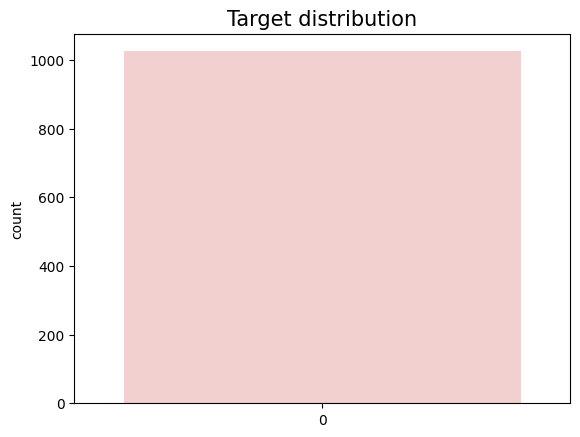

In [8]:
x= heart['target']
sns.countplot(x)
ax = sns.countplot(x, palette= ['#f7cac9',"#dec2cb"])
ax.set_title('Target distribution', fontsize=15)

<AxesSubplot:>

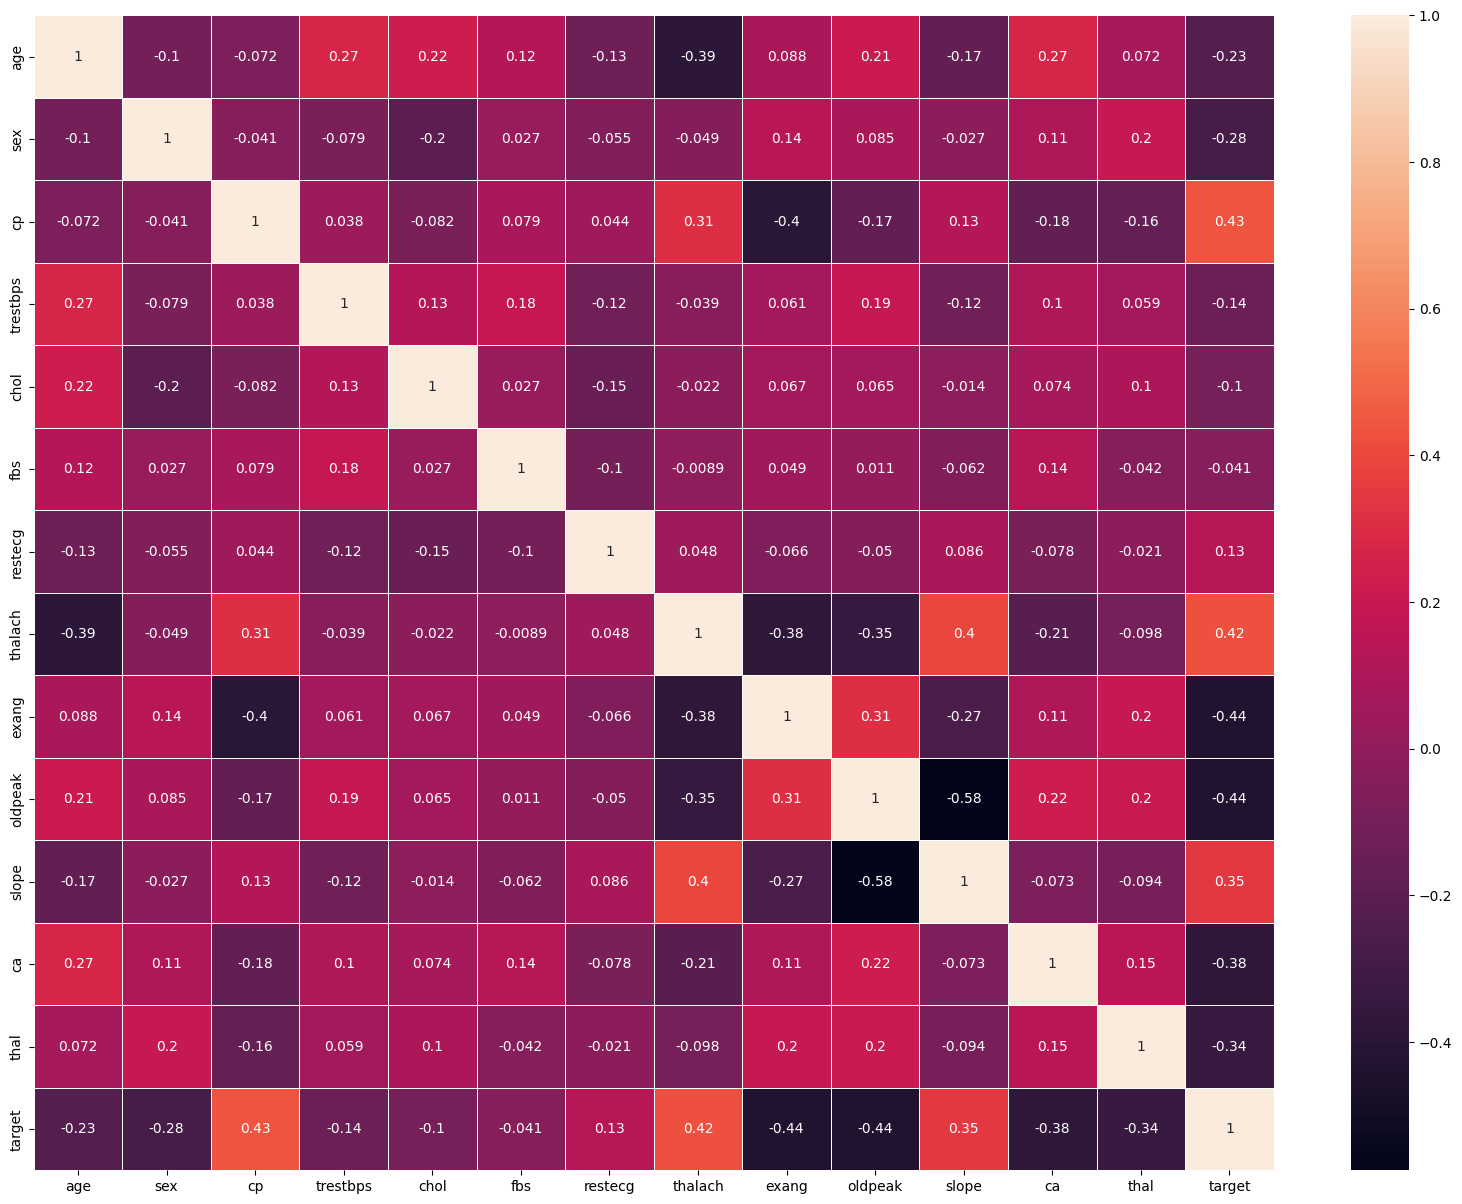

In [9]:
#relationship analysis
correlation = heart.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True, linewidths=.5)

## Implementing Gradient Boosting

In [10]:
X = heart.drop(columns = 'target', axis=1)
Y= heart['target']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

## Gradient Boosting using scikit-learn

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
ensemble = GradientBoostingClassifier(max_depth=5, n_estimators=30,learning_rate=0.05)
ensemble.fit(X_train, Y_train)
target_prediction_ensemble = ensemble.predict(X_test)
error = 1 - accuracy_score(Y_test, target_prediction_ensemble)
print(error*100)

8.171206225680939


In [13]:
accuracy_gb_skl= accuracy_score(Y_test, target_prediction_ensemble)
accuracy_gb_skl*100

91.82879377431907

## Implementing AdaBoost

In [14]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

## AdaBoost using scikit-learn

In [15]:
from sklearn.ensemble import AdaBoostClassifier
m = AdaBoostClassifier( n_estimators=30,learning_rate=0.5)
m.fit(X_train, Y_train)
target_prediction_ada = m.predict(X_test)
error_ada = 1 - accuracy_score(Y_test, target_prediction_ada)
print(error_ada*100)

11.284046692607008


In [16]:
accuracy_ada_skl= accuracy_score(Y_test, target_prediction_ada)
accuracy_ada_skl*100

88.715953307393

## Gradio

In [17]:
def classify(num):
    if num<1:
        return 'Not at risk of Heart Disease'
    else:
        return 'At risk of Heart Disease'

In [18]:
import gradio as gr
import numpy as np
def predict_hd(age, sex, cp, trestbps, chol, fbs, restecg, thalach,exang, oldpeak, slope, ca, thal):
    input_array=np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach,exang, oldpeak, slope, ca, thal]])
    pred=ensemble.predict(input_array)
    output=classify(pred[0])
    if output=='Not at risk of Heart Disease':
        return [(0,output)]
    else:
        return [(1,output)]

In [ ]:
age = gr.inputs.Number( default=None, label="Age")
sex = gr.inputs.Number( default=None,  label="Gender")
cp =gr.inputs.Number( default=None,label="Chest Pain")
trestbps = gr.inputs.Number( default=None, label="Resting Blood Pressure")
chol = gr.inputs.Number(default=None, label="Cholesterol")
fbs = gr.inputs.Number( default=None,  label="Fasting Blood Sugar")
restecg = gr.inputs.Number( default=None, label="Rest Electrocardiographic")
thalach = gr.inputs.Number( default=None, label="Max Heart Rate Achieved")
exang = gr.inputs.Number( default=None, label="Exercise Induced Angina")
oldpeak = gr.inputs.Number(default=None,  label="St Depression")
slope = gr.inputs.Number( default=None, label="Slope")
ca = gr.inputs.Number( default=None,label="Number of Major Vessels")
thal = gr.inputs.Number( default=None,label="Thalassemia")
op=gr.outputs.HighlightedText(color_map={ "Not at risk of Heart Disease": "lightgreen","At risk of Heart Disease": "pink"})

gr.Interface(predict_hd, inputs=[age, sex, cp, trestbps, chol, fbs, restecg, thalach,exang, oldpeak, slope, ca, thal], outputs=op,live=True).launch(debug=True)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
